# Tugas Besar IF2220 Probabilitas dan Statistika
## **Penarikan Kesimpulan dan Pengujian Hipotesis**

### Kelas: K01
### Dibuat oleh:
1. Nelsen Putra - 13520130
2. Willy Wilsen - 13520160

### Tujuan
- Mahasiswa memahami dan dapat menyelesaikan persoalan distribusi peluang variabel random diskrit dan kontinu.
- Mahasiswa mampu menyelesaikan persoalan untuk menarik kesimpulan mengenai parameter populasi yang diperoleh dari data hasil eksperimen.
- Mahasiswa mampu menyelesaikan persoalan pengujian hipotesis.
### Deskripsi Tugas
Diberikan sebuah data water_potability.csv yang dapat diakses pada Dataset Tugas Besar IF2220. water_potability.csv merupakan data metrik kualitas air yang mengandung 11 kolom sebagai berikut:
1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.
Kelompok diminta untuk melakukan analisis statistika sebagai berikut:

## Tahap 0 - Persiapan

### Import Library

In [294]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import scipy
from scipy import stats as st
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

### Pembacaan Data water_potability.csv
Membaca file spesifikasi yang diberikan dan memberikan nama setiap kolom.

In [295]:
column_names = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df = pd.read_csv("water_potability.csv", header = None, names = column_names)
df

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


## Tahap 1 - Deskripsi Statistika
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Ditambahkan juga perhitungan jumlah data untuk setiap kolom.

In [296]:
# Prosedur untuk menulis deskripsi statistik dari kolom c pada tabel
def printStatistic(c):
    print("count\t\t\t: {}".format(len(c)))
    print("mean\t\t\t: {}".format(c.mean()))
    print("median\t\t\t: {}".format(c.median()))
    print("modus\t\t\t:", end = " ")
    if (len(c.mode() > 1)):
        print("seluruh data adalah modus")
    else:
        print("{}".format(c.mode()))
    print("standar deviasi\t\t: {}".format(c.std()))
    print("variansi\t\t: {}".format(c.std()**2))
    print("range\t\t\t: {}".format(c.max()-c.min()))
    print("nilai minimum\t\t: {}".format(c.min()))
    print("nilai maksimum\t\t: {}".format(c.max()))
    quartiles = c.quantile([0,0.25,0.5,0.75,1])
    for i,quartile in enumerate(quartiles):
        print("quartil-{}\t\t: {}".format(i,quartile))
    print("IQR\t\t\t: {}".format(quartiles[0.75]-quartiles[0.25]))
    print("skewness\t\t: {}".format(c.skew()))
    print("kurtosis\t\t: {}".format(st.kurtosis(c, fisher=False)))

### 1. id
Id tidak perlu ditulis deskripsi statistikanya karena id merepresentasikan identifier yang unik untuk tiap data.

### 2. pH

In [297]:
pH = df["pH"]
printStatistic(pH)

count			: 2010
mean			: 7.0871927687138205
median			: 7.0294904554741855
modus			: seluruh data adalah modus
standar deviasi		: 1.5728029470456644
variansi		: 2.473709110235527
range			: 13.7725009497978
nilai minimum		: 0.2274990502021987
nilai maksimum		: 13.999999999999998
quartil-0		: 0.2274990502021987
quartil-1		: 6.09078502142353
quartil-2		: 7.0294904554741855
quartil-3		: 8.053006240791538
quartil-4		: 13.999999999999998
IQR			: 1.9622212193680078
skewness		: 0.04853451405270677
kurtosis		: 3.622362158216349


### 3. Hardness

In [298]:
Hardness = df["Hardness"]
printStatistic(Hardness)

count			: 2010
mean			: 195.96920903783553
median			: 197.20352491941043
modus			: seluruh data adalah modus
standar deviasi		: 32.64316585942984
variansi		: 1065.576277326246
range			: 243.84589036652147
nilai minimum		: 73.4922336890611
nilai maksimum		: 317.33812405558257
quartil-0		: 73.4922336890611
quartil-1		: 176.74065667669896
quartil-2		: 197.20352491941043
quartil-3		: 216.4475886672716
quartil-4		: 317.33812405558257
IQR			: 39.70693199057263
skewness		: -0.0853210417286861
kurtosis		: 3.5211906487769773


### 4. Solids

In [299]:
Solids = df["Solids"]
printStatistic(Solids)

count			: 2010
mean			: 21904.673439053087
median			: 20926.88215534375
modus			: seluruh data adalah modus
standar deviasi		: 8625.397911190577
variansi		: 74397489.12637077
range			: 56167.729801464826
nilai minimum		: 320.942611274359
nilai maksimum		: 56488.672412739186
quartil-0		: 320.942611274359
quartil-1		: 15614.412961614333
quartil-2		: 20926.88215534375
quartil-3		: 27170.5346486036
quartil-4		: 56488.672412739186
IQR			: 11556.121686989267
skewness		: 0.5910113724580435
kurtosis		: 3.333498156306705


### 5. Chloramines

In [300]:
Chloramines = df["Chloramines"]
printStatistic(Chloramines)

count			: 2010
mean			: 7.134322344600092
median			: 7.142014304622665
modus			: seluruh data adalah modus
standar deviasi		: 1.5852140982642093
variansi		: 2.5129037373356105
range			: 11.736129095114823
nilai minimum		: 1.3908709048851806
nilai maksimum		: 13.127000000000002
quartil-0		: 1.3908709048851806
quartil-1		: 6.138326387572855
quartil-2		: 7.142014304622665
quartil-3		: 8.109933216133502
quartil-4		: 13.127000000000002
IQR			: 1.9716068285606472
skewness		: 0.01300349777956952
kurtosis		: 3.5454318545555785


### 6. Sulfate

In [301]:
Sulfate = df["Sulfate"]
printStatistic(Sulfate)

count			: 2010
mean			: 333.21137641518925
median			: 332.2141128069568
modus			: seluruh data adalah modus
standar deviasi		: 41.21111102560977
variansi		: 1698.355671965135
range			: 352.03064230599716
nilai minimum		: 129.00000000000003
nilai maksimum		: 481.03064230599716
quartil-0		: 129.00000000000003
quartil-1		: 307.6269864860709
quartil-2		: 332.2141128069568
quartil-3		: 359.2681473914155
quartil-4		: 481.03064230599716
IQR			: 51.64116090534458
skewness		: -0.04572780443653542
kurtosis		: 3.7819149219038852


### 7. Conductivity

In [302]:
Conductivity = df["Conductivity"]
printStatistic(Conductivity)

count			: 2010
mean			: 426.4767083525792
median			: 423.43837202443706
modus			: seluruh data adalah modus
standar deviasi		: 80.70187180729437
variansi		: 6512.792113200973
range			: 551.7228828031471
nilai minimum		: 201.6197367551575
nilai maksimum		: 753.3426195583046
quartil-0		: 201.6197367551575
quartil-1		: 366.6192192963244
quartil-2		: 423.43837202443706
quartil-3		: 482.2097724598859
quartil-4		: 753.3426195583046
IQR			: 115.59055316356154
skewness		: 0.26801233302645305
kurtosis		: 2.760400057844864


### 8. OrganicCarbon

In [303]:
OrganicCarbon = df["OrganicCarbon"]
printStatistic(OrganicCarbon)

count			: 2010
mean			: 14.357939902048088
median			: 14.323285610653329
modus			: seluruh data adalah modus
standar deviasi		: 3.325770001698719
variansi		: 11.060746104199096
range			: 24.80670661116602
nilai minimum		: 2.1999999999999886
nilai maksimum		: 27.00670661116601
quartil-0		: 2.1999999999999886
quartil-1		: 12.122530374047729
quartil-2		: 14.323285610653329
quartil-3		: 16.683561746173808
quartil-4		: 27.00670661116601
IQR			: 4.561031372126079
skewness		: -0.020219756291812333
kurtosis		: 3.027957691493331


### 9. Trihalomethanes

In [304]:
Trihalomethanes = df["Trihalomethanes"]
printStatistic(Trihalomethanes)

count			: 2010
mean			: 66.40071666307463
median			: 66.48204080309809
modus			: seluruh data adalah modus
standar deviasi		: 16.081108982325134
variansi		: 258.6020661014181
range			: 115.4229870670162
nilai minimum		: 8.577012932983806
nilai maksimum		: 124.0
quartil-0		: 8.577012932983806
quartil-1		: 55.94999302803187
quartil-2		: 66.48204080309809
quartil-3		: 77.29461280606742
quartil-4		: 124.0
IQR			: 21.34461977803555
skewness		: -0.051382684516194765
kurtosis		: 3.2194788089667052


### 10. Turbidity

In [305]:
Turbidity = df["Turbidity"]
printStatistic(Turbidity)

count			: 2010
mean			: 3.969496912630371
median			: 3.967373963531836
modus			: seluruh data adalah modus
standar deviasi		: 0.7804710407083955
variansi		: 0.6091350453844459
range			: 5.044748555990991
nilai minimum		: 1.45
nilai maksimum		: 6.494748555990991
quartil-0		: 1.45
quartil-1		: 3.4428816235574393
quartil-2		: 3.967373963531836
quartil-3		: 4.514662720201883
quartil-4		: 6.494748555990991
IQR			: 1.071781096644444
skewness		: -0.032265979680192944
kurtosis		: 2.9473094836957934


### 11. Potability
Potability tidak perlu ditulis deskripsi statistikanya karena potability adalah kolom yang merupakan target.

## Tahap 2 - Visualisasi
Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik.

### 1. id
Kolom id tidak perlu divisualisasi karena selalu unik untuk setiap data.

### 2. pH

Text(0, 0.5, 'Frekuensi')

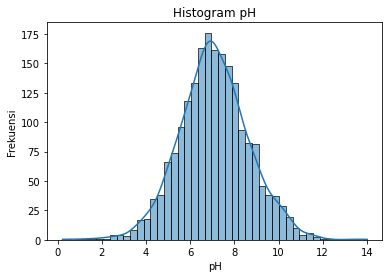

In [306]:
# Histogram kolom pH

HistpH = sns.histplot(pH, kde = True)
HistpH.set_title("Histogram pH")
HistpH.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot pH')

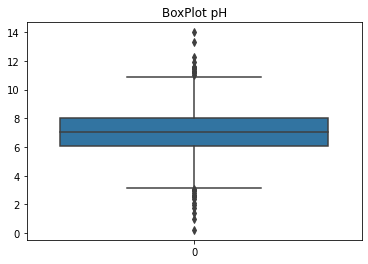

In [307]:
# Boxplot kolom pH

BoxPlotpH= sns.boxplot(data = pH)
BoxPlotpH.set_title("BoxPlot pH")

### 3. Hardness

Text(0, 0.5, 'Frekuensi')

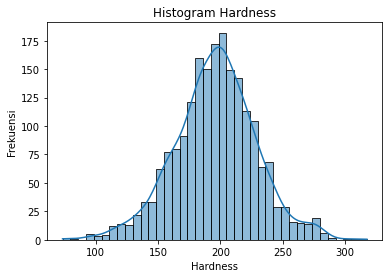

In [308]:
# Histogram kolom Hardness

HistHardness = sns.histplot(Hardness, kde = True)
HistHardness.set_title("Histogram Hardness")
HistHardness.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Hardness')

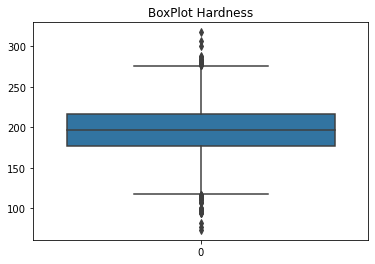

In [309]:
# Boxplot kolom Hardness

BoxPlotHardness = sns.boxplot(data = Hardness)
BoxPlotHardness.set_title("BoxPlot Hardness")

### 4. Solids

Text(0, 0.5, 'Frekuensi')

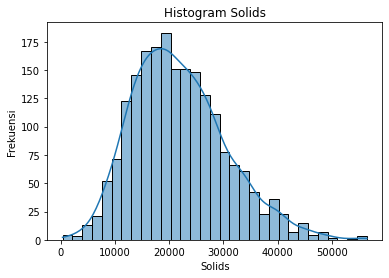

In [310]:
# Histogram kolom Solids

HistSolids = sns.histplot(Solids, kde = True)
HistSolids.set_title("Histogram Solids")
HistSolids.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Solids')

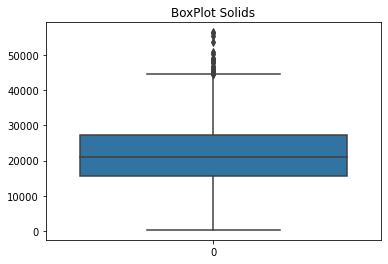

In [311]:
# Boxplot kolom Solids

BoxPlotSolids = sns.boxplot(data = Solids)
BoxPlotSolids.set_title("BoxPlot Solids")

### 5. Chloramines

Text(0, 0.5, 'Frekuensi')

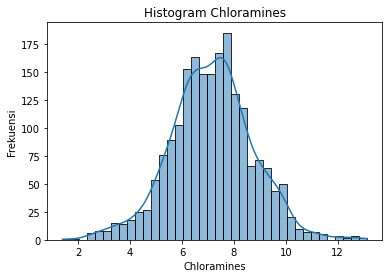

In [312]:
# Histogram kolom Chloramines

HistChloramines = sns.histplot(Chloramines, kde = True)
HistChloramines.set_title("Histogram Chloramines")
HistChloramines.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Chloramines')

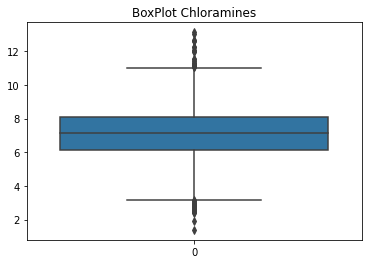

In [313]:
# Boxplot kolom Chloramines

BoxPlotChloramines = sns.boxplot(data = Chloramines)
BoxPlotChloramines.set_title("BoxPlot Chloramines")

### 6. Sulfate

Text(0, 0.5, 'Frekuensi')

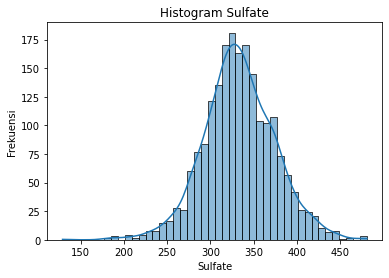

In [314]:
# Histogram kolom Sulfate

HistSulfate = sns.histplot(Sulfate, kde = True)
HistSulfate.set_title("Histogram Sulfate")
HistSulfate.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Sulfate')

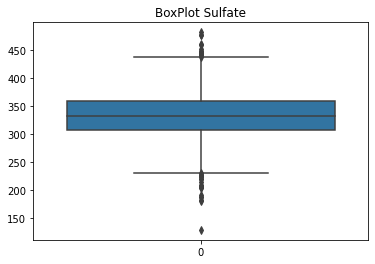

In [315]:
# Boxplot kolom Sulfate

BoxPlotSulfate = sns.boxplot(data = Sulfate)
BoxPlotSulfate.set_title("BoxPlot Sulfate")

### 7. Conductivity

Text(0, 0.5, 'Frekuensi')

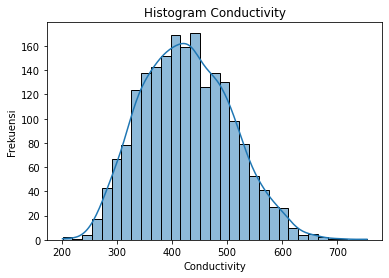

In [316]:
# Histogram kolom Conductivity

HistConductivity = sns.histplot(Conductivity, kde = True)
HistConductivity.set_title("Histogram Conductivity")
HistConductivity.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Conductivity')

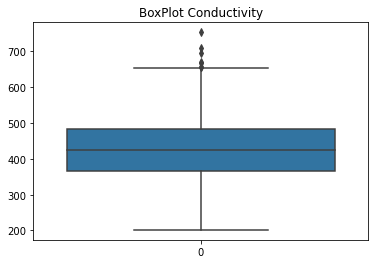

In [317]:
# Boxplot kolom Conductivity

BoxPlotConductivity = sns.boxplot(data = Conductivity)
BoxPlotConductivity.set_title("BoxPlot Conductivity")

### 8. OrganicCarbon

Text(0, 0.5, 'Frekuensi')

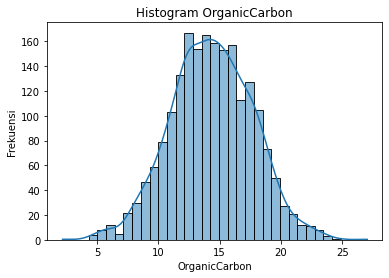

In [318]:
# Histogram kolom OrganicCarbon

HistOrganicCarbon = sns.histplot(OrganicCarbon, kde = True)
HistOrganicCarbon.set_title("Histogram OrganicCarbon")
HistOrganicCarbon.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot OrganicCarbon')

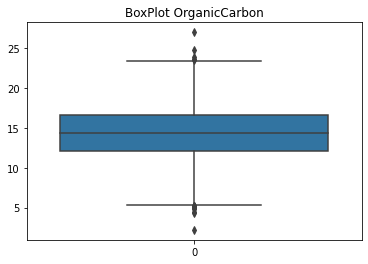

In [319]:
# Boxplot kolom OrganicCarbon

BoxPlotOrganicCarbon = sns.boxplot(data = OrganicCarbon)
BoxPlotOrganicCarbon.set_title("BoxPlot OrganicCarbon")

### 9. Trihalomethanes

Text(0, 0.5, 'Frekuensi')

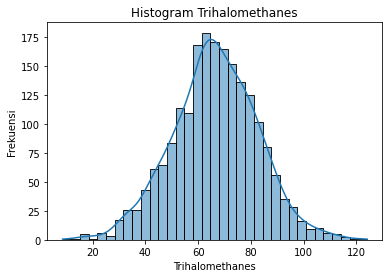

In [320]:
# Histogram kolom Trihalomethanes

HistTrihalomethanes = sns.histplot(Trihalomethanes, kde = True)
HistTrihalomethanes.set_title("Histogram Trihalomethanes")
HistTrihalomethanes.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Trihalomethanes')

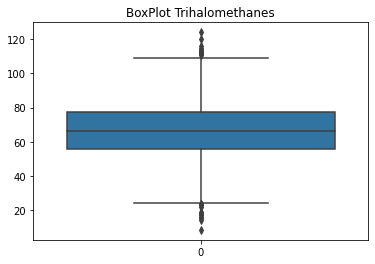

In [321]:
# Boxplot kolom Trihalomethanes

BoxPlotTrihalomethanes = sns.boxplot(data = Trihalomethanes)
BoxPlotTrihalomethanes.set_title("BoxPlot Trihalomethanes")

### 10. Turbidity

Text(0, 0.5, 'Frekuensi')

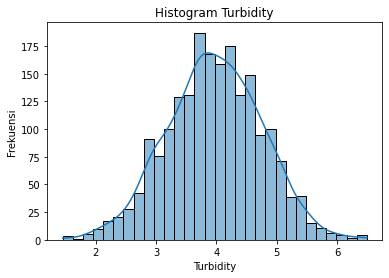

In [322]:
# Histogram kolom Turbidity

HistTurbidity = sns.histplot(Turbidity, kde = True)
HistTurbidity.set_title("Histogram Turbidity")
HistTurbidity.set_ylabel("Frekuensi")

Text(0.5, 1.0, 'BoxPlot Turbidity')

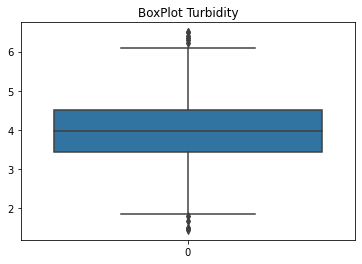

In [323]:
# Boxplot kolom Turbidity

BoxPlotTurbidity = sns.boxplot(data = Turbidity)
BoxPlotTurbidity.set_title("BoxPlot Turbidity")

### 11. Potability
Kolom potability tidak perlu divisualisasi karena merupakan kolom target.

## Tahap 3 - Tes Normality
Menentukan setiap kolom numerik berdistribusi normal atau tidak dengan menggunakan normality test yang dikaitkan dengan histogram plot.

### 1. Id
Kolom id tidak perlu dilakukan normality test karena selalu unik untuk setiap data.

### 2. pH

p = 2.65148e-05
H0 ditolak, sehingga data tidak terdistribusi dengan normal


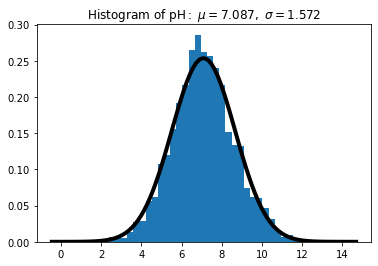

In [324]:
k, p = st.normaltest(pH)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(pH)
plt.hist(pH, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ pH:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 3. Hardness

p = 0.000134424
H0 ditolak, sehingga data tidak terdistribusi dengan normal


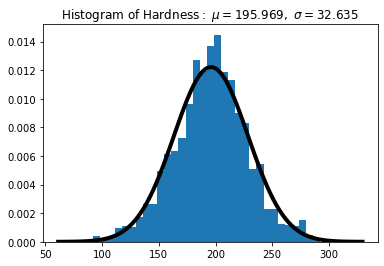

In [325]:
k, p = st.normaltest(Hardness)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Hardness)
plt.hist(Hardness, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Hardness:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 4. Solids

p = 2.07966e-24
H0 ditolak, sehingga data tidak terdistribusi dengan normal


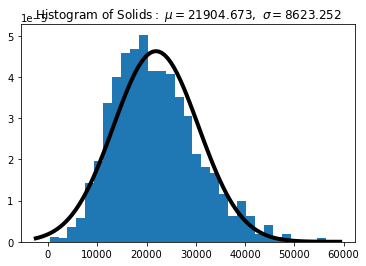

In [326]:
k, p = st.normaltest(Solids)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Solids)
plt.hist(Solids, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Solids:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 5. Chloramines

p = 0.000250483
H0 ditolak, sehingga data tidak terdistribusi dengan normal


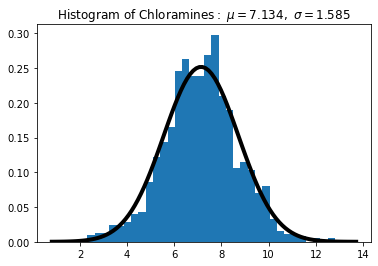

In [327]:
k, p = st.normaltest(Chloramines)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Chloramines)
plt.hist(Chloramines, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Chloramines:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 6. Sulfate

p = 4.42559e-07
H0 ditolak, sehingga data tidak terdistribusi dengan normal


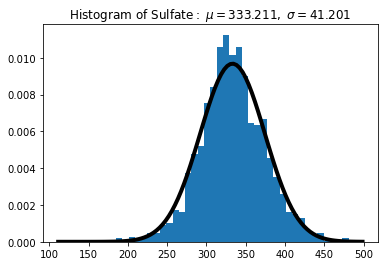

In [328]:
k, p = st.normaltest(Sulfate)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Sulfate)
plt.hist(Sulfate, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Sulfate:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 7. Conductivity

p = 4.39018e-07
H0 ditolak, sehingga data tidak terdistribusi dengan normal


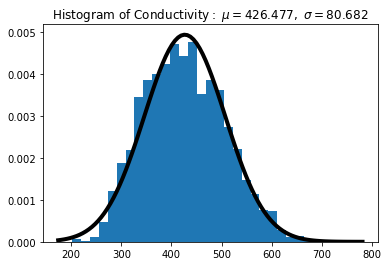

In [329]:
k, p = st.normaltest(Conductivity)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Conductivity)
plt.hist(Conductivity, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Conductivity:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 8. OrganicCarbon

p = 0.88255
H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal


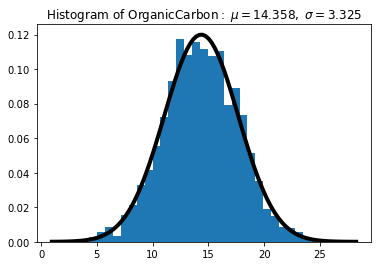

In [330]:
k, p = st.normaltest(OrganicCarbon)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(OrganicCarbon)
plt.hist(OrganicCarbon, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ OrganicCarbon:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 9. Trihalomethanes

p = 0.10436
H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal


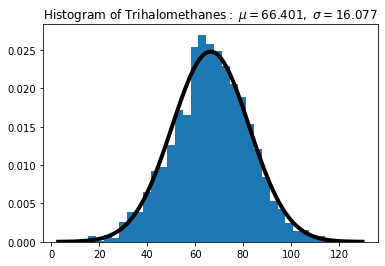

In [331]:
k, p = st.normaltest(Trihalomethanes)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Trihalomethanes)
plt.hist(Trihalomethanes, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Trihalomethanes:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 10. Turbidity

p = 0.769472
H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal


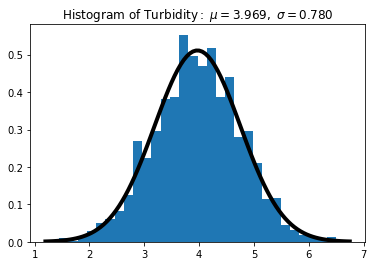

In [332]:
k, p = st.normaltest(Turbidity)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 ditolak, sehingga data tidak terdistribusi dengan normal")
else:
    print("H0 tidak bisa ditolak, sehingga data terdistribusi dengan normal")

mu, sigma = st.norm.fit(Turbidity)
plt.hist(Turbidity, bins = 'auto', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Turbidity:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.plot(x, y,'k',lw=4)

### 11. Potability
Kolom potability tidak perlu dilakukan normality test karena merupakan kolom target.

## Tahap 4 - Tes Hipotesis 1 Sampel
Melakukan test hipotesis 1 sampel dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

**Enam Langkah Testing:**
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0 , θ < θ0 , atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [333]:
def Z_testStatistic(x̄,μ0,σ,root_n):
    return (float)(x̄-μ0)/(σ/root_n)
def Z_testStatistic_bigN(p̂,p0,q0,n):
    return (float)(p̂-p0)/np.sqrt(p0*q0/n)
def T_testStatistic(x̄,μ0,s,root_n):
    return (float)(x̄-μ0)/(s/root_n)

### a. Nilai rata-rata pH di atas 7?
Asumsi sampel yang dicek sejumlah 2010 di mana 2010 data tersebut juga merupakan populasi (sampel yang dicek sekaligus populasi). Oleh karena itu, digunakan uji statistik distribusi Z untuk satu mean dengan standar deviasi populasi diketahui.

Nilai rata-rata pH di atas 7?
1. H0: μ=7
2. H1: μ>7
3. α = 0.05
4. Uji Statistik: z=(x̄-μ0)/(σ/root_n), σ diketahui
   Daerah Kritis: z>zα : z>1.645
5. Komputasi
   x̄: 7.0871927687138205 
   root_n: 44.83302354291979 
   σ: 1.5728029470456644 
   μ0: 7
   p_value: 0.006477571731867804 
   z: 2.485
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 2.485>1.645 (z>zα)
   Rata-Rata pH di atas 7


Text(0.5, 1.0, 'BoxPlot pH')

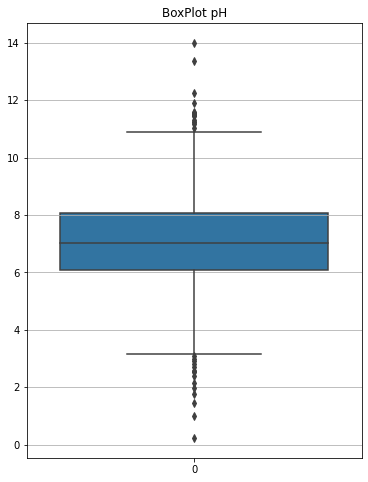

In [334]:
print("Nilai rata-rata pH di atas 7?")

# Langkah 1
H0 = "μ=7"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "μ>7"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα = round(scipy.stats.norm.ppf(1-α),3)
print("4. Uji Statistik: z=(x̄-μ0)/(σ/root_n), σ diketahui")
print("   Daerah Kritis: z>zα : z>{}".format(zα))

# Langkah 5
x̄ = pH.mean()
μ0= 7
σ = pH.std()
root_n = np.sqrt(len(pH))
z = round(Z_testStatistic(x̄,μ0,σ,root_n),3)
p_value = 1-scipy.stats.norm.cdf(z)
print("5. Komputasi")
print("   x̄: {} \n   root_n: {} \n   σ: {} \n   μ0: {}".format(x̄,root_n,σ,μ0))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα):
    print("   Tolak H0 karena nilai uji = {}>{} (z>zα)".format(str(z),str(zα)))
    print("   Rata-Rata pH di atas 7")
else:
    print("   Terima H0 karena nilai uji = {}<={} (z<=zα)".format(str(z),str(zα)))
    print("   Rata-Rata pH sama dengan 7")

# Menggambar Boxplot pH
# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot
BoxPlotpH= sns.boxplot(data=pH)
BoxPlotpH.set_title("BoxPlot pH")

### b. Nilai rata-rata Hardness tidak sama dengan 205?
Asumsi sampel yang dicek sejumlah 2010 di mana 2010 data tersebut juga merupakan populasi (sampel yang dicek sekaligus populasi). Oleh karena itu, digunakan uji statistik distribusi Z untuk satu mean dengan standar deviasi populasi diketahui.

Nilai rata-rata Hardness tidak sama dengan 205?
1. H0: μ=205
2. H1: μ≠205
3. α = 0.05
4. Uji Statistik: z=(x̄-μ0)/(σ/root_n), σ diketahui
   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>1.96 atau z<-1.96
5. Komputasi
   x̄: 195.96920903783553 
   n: 2010 
   root_n: 44.83302354291979 
   σ: 32.64316585942984 
   μ0: 205
   p_value: 0.0 
   z: -12.403
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = -12.403<-1.96 (z<-zα/2)
   Rata-rata Hardness tidak sama dengan 205


Text(0.5, 1.0, 'BoxPlot Hardness')

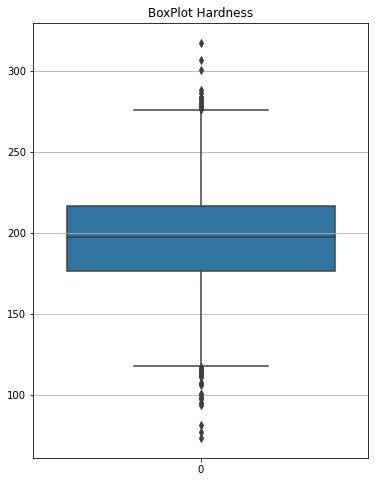

In [335]:
print("Nilai rata-rata Hardness tidak sama dengan 205?")

# Langkah 1
H0 = "μ=205"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "μ≠205"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα_div2 = round(scipy.stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik: z=(x̄-μ0)/(σ/root_n), σ diketahui")
print("   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>{} atau z<{}".format(zα_div2,-1*zα_div2))

# Langkah 5
x̄ = Hardness.mean()
μ0= 205
σ = Hardness.std()
n = len(Hardness)
root_n = np.sqrt(n)
z = round(Z_testStatistic(x̄,μ0,σ,root_n),3)
p_value = 1-abs(scipy.stats.norm.cdf(z)-scipy.stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄: {} \n   n: {} \n   root_n: {} \n   σ: {} \n   μ0: {}".format(x̄,n,root_n,σ,μ0))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα_div2))
    print("   Rata-rata Hardness tidak sama dengan 205")
else:
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα_div2,z,zα_div2))
    print("   Rata-rata Hardness sama dengan 205")
    
# Menggambar Boxplot Hardness
# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot
BoxPlotHardness= sns.boxplot(data=Hardness)
BoxPlotHardness.set_title("BoxPlot Hardness")

### c. Nilai rata-rata 100 baris pertama kolom Solids bukan 21900?
Asumsi sampel yang dicek sejumlah 100, yakni 100 baris pertama dari populasi yang berjumlah 2010 baris. Oleh karena itu, digunakan uji statistik distribusi t untuk satu mean dengan standar deviasi populasi diketahui.

Nilai rata-rata 100 baris pertama kolom Solids bukan 21900?
1. H0: μ=21900
2. H1: μ≠21900
3. α = 0.05
4. Uji Statistik: z=(x̄-μ0)/(σ/root_n), σ diketahui
   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>1.96 atau z<1.96
5. Komputasi
   x̄: 22347.334446383422 
   root_n: 10.0 
   σ: 8625.397911190577 
   μ0: 21900
   p_value: 0.6037607412507624 
   z: 0.519
6. Test Daerah Kritis
   Terima H0 karena nilai uji = -1.96<0.519<1.96 (-zα/2<z<zα/2)
   Nilai Rata-rata 100 baris pertama kolom Solids sama dengan 21900


Text(0.5, 1.0, 'BoxPlot newSolids')

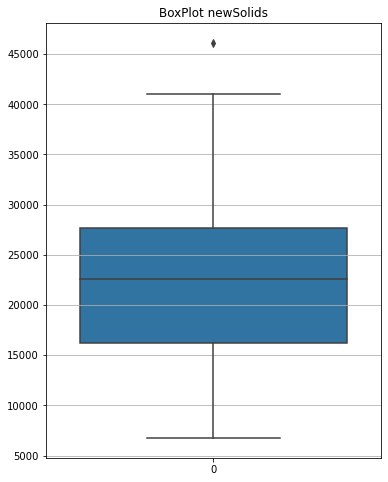

In [336]:
print("Nilai rata-rata 100 baris pertama kolom Solids bukan 21900?")

# Langkah 1
H0 = "μ=21900"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "μ≠21900"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα_div2 = round(scipy.stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik: z=(x̄-μ0)/(σ/root_n), σ diketahui")
print("   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>{} atau z<{}".format(zα_div2,zα_div2))

# Langkah 5
newSolids = Solids[:100]
x̄ = newSolids.mean()
μ0= 21900
σ = Solids.std()
n = len(newSolids)
root_n = np.sqrt(n)
z = round(Z_testStatistic(x̄,μ0,σ,root_n),3)
p_value = 1-abs(scipy.stats.norm.cdf(z)-scipy.stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄: {} \n   root_n: {} \n   σ: {} \n   μ0: {}".format(x̄,root_n,σ,μ0))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα_div2))
    print("   Nilai Rata-rata 100 baris pertama kolom Solids tidak sama dengan 21900")
else:
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα_div2,z,zα_div2))
    print("   Nilai Rata-rata 100 baris pertama kolom Solids sama dengan 21900")

# Menggambar Boxplot Solids
# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot
BoxPlotSolids= sns.boxplot(data=newSolids)
BoxPlotSolids.set_title("BoxPlot newSolids")

### d. Proporsi nilai Conductivity yang lebih dari 450 adalah tidak sama dengan 10%?
Digunakan uji statistik berupa uji proporsi dengan n besar (binomial mendekati normal).

Proporsi nilai Conductivity yang lebih dari 450 adalah tidak sama dengan 10%?
1. H0: p=0.10
2. H1: p≠0.10
3. α = 0.05
4. Uji Statistik: z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui
   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>1.96 atau z<1.96
5. Komputasi
   p̂: 0.3706467661691542 
   p0: 0.1 
   q0: 0.9 
   n: 2010
   p_value: 0.0 
   z: 40.446
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = 40.446>1.96 (z>zα/2)
   Proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%


Text(0.5, 1.0, 'BoxPlot Conductivity')

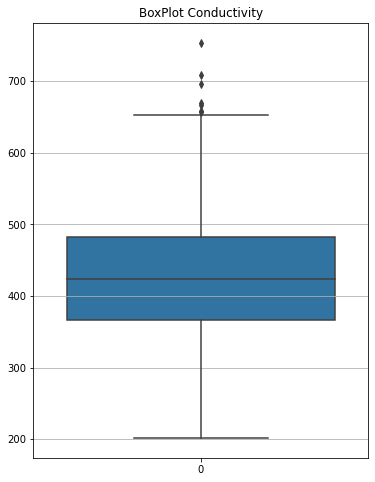

In [337]:
print("Proporsi nilai Conductivity yang lebih dari 450 adalah tidak sama dengan 10%?")

# Langkah 1
H0 = "p=0.10"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "p≠0.10"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4

zα_div2 = round(scipy.stats.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik: z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui")
print("   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>{} atau z<{}".format(zα_div2,zα_div2))

# Langkah 5
newConductivity = [dia for dia in Conductivity if dia > 450]
p̂ = len(newConductivity)/len(Conductivity)
p0 = 0.10
q0 = 1-p0
n = len(Conductivity)
z = round(Z_testStatistic_bigN(p̂,p0,q0,n),3)
p_value = 1-abs(scipy.stats.norm.cdf(z)-scipy.stats.norm.cdf(-1*z))
print("5. Komputasi")
print("   p̂: {} \n   p0: {} \n   q0: {} \n   n: {}".format(p̂,p0,q0,n))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα/2)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα/2)".format(z,-1*zα_div2))
    print("   Proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%")
else:
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα/2<z<zα/2)".format(-1*zα_div2,z,zα_div2))
    print("   Proporsi nilai Conductivity yang lebih dari 450 sama dengan 10%")

# Menggambar Boxplot Conductivity
# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot
BoxPlotConductivity= sns.boxplot(data=Conductivity)
BoxPlotConductivity.set_title("BoxPlot Conductivity")

### e. Proporsi nilai Trihalomethanes yang kurang dari 40 adalah kurang dari 5%?
Digunakan uji statistik berupa uji proporsi dengan n besar (binomial mendekati normal).

Proporsi nilai Trihalomethanes yang kurang dari 40 adalah kurang dari 5%?
1. H0: p=0.05
2. H1: p<0.05
3. α = 0.05
4. Uji Statistik: z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui
   Daerah Kritis: z<-zα : z<-1.645
5. Komputasi
   p̂: 0.0527363184079602 
   p0: 0.05 
   q0: 0.95 
   n: 2010
   p_value: 0.7132825580297869 
   z: 0.563
6. Test Daerah Kritis
   Terima H0 karena nilai uji = 0.563>=-1.645 (z>=-zα)
   Proporsi nilai Trihalomethanes yang kurang dari 40 adalah sama dengan 5%


Text(0.5, 1.0, 'BoxPlot Trihalomethanes')

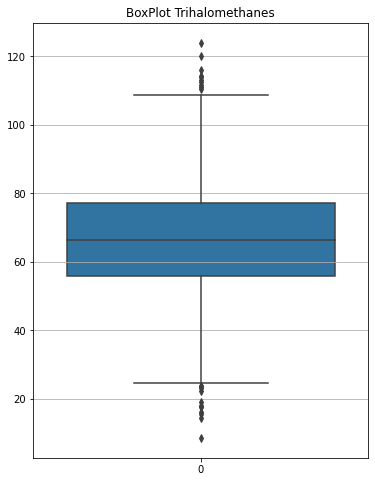

In [338]:
print("Proporsi nilai Trihalomethanes yang kurang dari 40 adalah kurang dari 5%?")

# Langkah 1
H0 = "p=0.05"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "p<0.05"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα = round(scipy.stats.norm.ppf(1-α),3)
print("4. Uji Statistik: z=(p̂-p0)/sqrt(p0*q0/n), σ diketahui")
print("   Daerah Kritis: z<-zα : z<{}".format(-1*zα))

# Langkah 5
newKel = [kel for kel in Trihalomethanes if kel < 40]
p̂ = len(newKel)/len(Trihalomethanes)
p0 = 0.05
q0 = 1-p0
n = len(Trihalomethanes)
z = round(Z_testStatistic_bigN(p̂,p0,q0,n),3)
p_value = scipy.stats.norm.cdf(z)
print("5. Komputasi")
print("   p̂: {} \n   p0: {} \n   q0: {} \n   n: {}".format(p̂,p0,q0,n))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z < -1*zα):
    print("   Tolak H0 karena nilai uji = {}<{} (z<-zα)".format(str(z),str(-1*zα)))
    print("   Proporsi nilai Trihalomethanes yang kurang dari 40 adalah kurang dari 5%")
else:
    print("   Terima H0 karena nilai uji = {}>={} (z>=-zα)".format(str(z),str(-zα)))
    print("   Proporsi nilai Trihalomethanes yang kurang dari 40 adalah sama dengan 5%")
    
# Menggambar Boxplot Trihalomethanes
# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot
BoxPlotTrihalomethanes= sns.boxplot(data=Trihalomethanes)
BoxPlotTrihalomethanes.set_title("BoxPlot Trihalomethanes")

## Tahap 5 - Tes Hipotesis 2 Sampel
Melakukan test hipotesis 2 sampel dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

**Enam Langkah Testing:**
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0 , θ < θ0 , atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [339]:
def Z_testStatistic_dual(x̄1,x̄2,d0,σ1_pow2,σ2_pow2,n1,n2):
    return (float)((x̄1-x̄2)-d0)/np.sqrt(σ1_pow2/n1+σ2_pow2/n2)
def Z_testStatistic_dualNormal(p̂1,p̂2,p̂,q̂,n1,n2):
    return (float)(p̂1-p̂2)/np.sqrt(p̂*q̂*(1/n1+1/n2))
def X_testStatistic(n,s,σ0):
    return (float)((n-1)*(s**2))/σ0**2
def X_testStatisticDual(s1,s2):
    return (float)(s1**2/s2**2)
def SP(n1,n2,s1_pow2,s2_pow2):
    return (float)(np.sqrt(((n1-1)*s1_pow2+(n2-1)*s2_pow2)/(n1+n2-2)))
def T_testStatistic_dual(x̄1,x̄2,d0,sp,n1,n2):
    return (float)((x̄1-x̄2)-d0)/(sp*np.sqrt(1/n1+1/n2))

### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
Asumsi pembagian kolom Sulfate menjadi 2 akan menghasilkan dua sampel berbeda dengan tiap sampel berjumlah 1005 baris dari populasi sejumlah 2010 baris. Oleh karena itu, digunakan uji statistik distribusi z untuk dua mean dengan standar deviasi populasi diketahui.

Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
1. H0: μ1=μ2
2. H1: μ1≠μ2 -> μ1-μ2≠0
3. α = 0.05
4. Uji Statistik: z=((x̄1-x̄2)-d0)/sqrt(σ1²/n1+σ2²/n2), σ diketahui
   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>1.96 atau z<1.96
5. Komputasi
   x̄1: 331.3053295054953 
   σ1: 41.332754590968776 
   σ1²: 1708.3966020772505 
   n1: 1005 
   x̄2: 335.11742332488234 
   σ2: 41.02112948764954 
   σ2²: 1682.7330644425106 
   n2: 1005
   d0: 0 
   p_value: 0.037986534771476954 
   z: -2.075
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = -2.075<-1.96 (z<zα)
   Rata-rata kedua bagian Sulfate tidak sama


<AxesSubplot:title={'center':'BoxPlot Sulfate1 dan Sulfate2'}, xlabel='Sulfate', ylabel='value'>

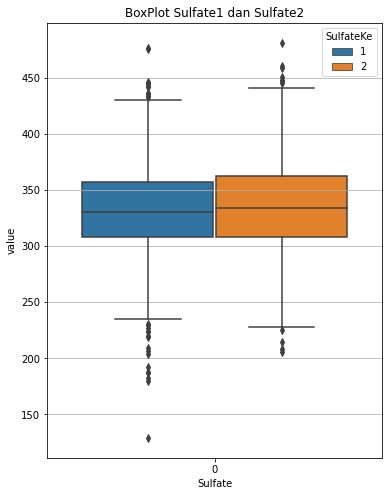

In [340]:
print("Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?")

# Langkah 1
H0 = "μ1=μ2"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "μ1≠μ2 -> μ1-μ2≠0"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα_div2 = round(st.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik: z=((x̄1-x̄2)-d0)/sqrt(σ1²/n1+σ2²/n2), σ diketahui")
print("   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>{} atau z<{}".format(zα_div2,zα_div2))

# Langkah 5
d0 = 0
Sulfate1 = Sulfate[:len(Sulfate)//2]
x̄1 = Sulfate1.mean()
σ1 = Sulfate1.std()
σ1_pow2 = σ1**2
n1 = len(Sulfate1)
Sulfate2 = Sulfate[len(Sulfate)//2:]
Sulfate2.reset_index(inplace=True, drop=True)
x̄2 = Sulfate2.mean()
σ2 = Sulfate2.std()
σ2_pow2 = σ2**2
n2 = len(Sulfate2)
z = round(Z_testStatistic_dual(x̄1,x̄2,d0,σ1_pow2,σ2_pow2,n1,n2),3)
p_value = 1-abs(st.norm.cdf(z)-st.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄1: {} \n   σ1: {} \n   σ1²: {} \n   n1: {} \n   x̄2: {} \n   σ2: {} \n   σ2²: {} \n   n2: {}".format(x̄1,σ1,σ1_pow2,n1,x̄2,σ2,σ2_pow2,n2))
print("   d0: {} \n   p_value: {} \n   z: {}".format(d0,str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<zα)".format(z,-1*zα_div2))
    print("   Rata-rata kedua bagian Sulfate tidak sama")
else:
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα<z<zα)".format(-1*zα_div2,z,zα_div2))
    print("   Rata-rata kedua bagian Sulfate sama")  

# Menggambar Boxplot Sulfate1 dan Sulfate2
# Mengubah ke dalam Bentuk Dataframe
dfSulfate1 = pd.DataFrame(data=Sulfate1.tolist()).assign(SulfateKe=1)
dfSulfate2 = pd.DataFrame(data=Sulfate2.tolist()).assign(SulfateKe=2)
# Mengombinasikan Dataframe
combine = pd.concat([dfSulfate1,dfSulfate2],sort=False)  
merge = pd.melt(combine, id_vars=['SulfateKe'], var_name=['Sulfate'])
merge
# Konfigurasi Boxplot
plt.figure(figsize=(6,8))
plt.grid()
# Penggambaran Boxplot Gabungan
BoxPlotSulfatem= sns.boxplot(x="Sulfate",y="value",hue="SulfateKe",data=merge)
BoxPlotSulfatem.set_title("BoxPlot Sulfate1 dan Sulfate2")
BoxPlotSulfatem

### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
Asumsi pembagian kolom OrganicCarbon menjadi 2 akan menghasilkan dua sampel berbeda dengan tiap sampel berjumlah 1005 baris dari populasi sejumlah 2010 baris. Oleh karena itu, digunakan uji statistik distribusi z untuk dua mean dengan standar deviasi populasi diketahui.

Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
1. H0: μ1-μ2=0.15
2. H1: μ1-μ2<0.15
3. α = 0.05
4. Uji Statistik: z=((x̄1-x̄2)-d0)/sqrt(σ1²/n1+σ2²/n2), σ diketahui
   Daerah Kritis: z<-zα : z<-1.645 
5. Komputasi
   x̄1: 14.253972723723418 
   σ1: 3.3511620707420784 
   σ1²: 11.230287224380335 
   n1: 1005 
   x̄2: 14.461907080372763 
   σ2: 3.2985726887318205 
   σ2²: 10.880581782847472 
   n2: 1005
   d0: 0.15 
   p_value: 0.008 
   z: -2.413
6. Test Daerah Kritis
   Tolak H0 karena nilai uji = -2.413<-1.645 (z<-zα)
   Selisih rata-rata bagian awal OrganicCarbon dengan bagian akhir OrganicCarbon sebesar kurang dari 0.15


<AxesSubplot:title={'center':'BoxPlot OrganicCarbon1 dan OrganicCarbon2'}, xlabel='OrganicCarbon', ylabel='value'>

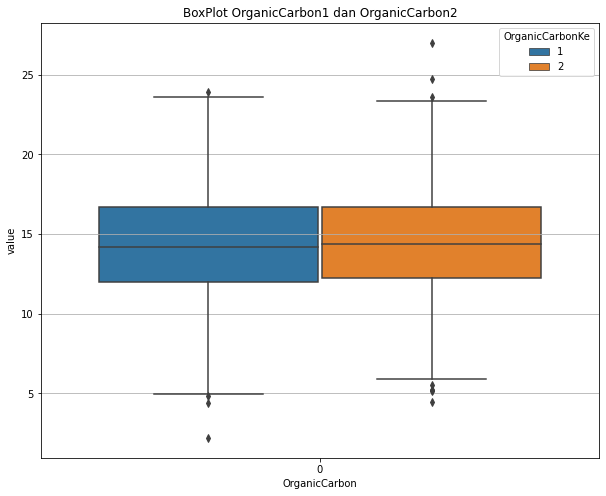

In [341]:
print("Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?")

# Langkah 1
H0 = "μ1-μ2=0.15"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "μ1-μ2<0.15"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα = round(st.norm.ppf(1-α),3)
print("4. Uji Statistik: z=((x̄1-x̄2)-d0)/sqrt(σ1²/n1+σ2²/n2), σ diketahui")
print("   Daerah Kritis: z<-zα : z<{} ".format(-1*zα))

# Langkah 5
d0 = 0.15
OrganicCarbon1 = OrganicCarbon[:len(OrganicCarbon)//2]
x̄1 = OrganicCarbon1.mean()
σ1 = OrganicCarbon1.std()
σ1_pow2 = σ1**2
n1 = len(OrganicCarbon1)
OrganicCarbon2 = OrganicCarbon[len(OrganicCarbon)//2:]
OrganicCarbon2.reset_index(inplace=True, drop=True)
x̄2 = OrganicCarbon2.mean()
σ2 = OrganicCarbon2.std()
σ2_pow2 =σ2**2
n2 = len(OrganicCarbon2)
z = round(Z_testStatistic_dual(x̄1,x̄2,d0,σ1_pow2,σ2_pow2,n1,n2),3)
p_value = round(st.norm.cdf(z),3)
print("5. Komputasi")
print("   x̄1: {} \n   σ1: {} \n   σ1²: {} \n   n1: {} \n   x̄2: {} \n   σ2: {} \n   σ2²: {} \n   n2: {}".format(x̄1,σ1,σ1_pow2,n1,x̄2,σ2,σ2_pow2,n2))
print("   d0: {} \n   p_value: {} \n   z: {}".format(d0,str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z < -1*zα):
    print("   Tolak H0 karena nilai uji = {}<{} (z<-zα)".format(str(z),str(-1*zα)))
    print("   Selisih rata-rata bagian awal OrganicCarbon dengan bagian akhir OrganicCarbon sebesar kurang dari 0.15")
else:
    print("   Terima H0 karena nilai uji = {}<={} (z<=zα)".format(str(z),str(zα_div2)))
    print("   Rata-rata bagian awal OrganicCarbon lebih besar dari pada bagian akhir OrganicCarbon sebesar 0.15")  

# Menggambar Boxplot OrganicCarbon1 dan OrganicCarbon2
# Mengubah ke dalam Bentuk Dataframe
dfOrganicCarbon1 = pd.DataFrame(data=OrganicCarbon1.tolist()).assign(OrganicCarbonKe=1)
dfOrganicCarbon2 = pd.DataFrame(data=OrganicCarbon2.tolist()).assign(OrganicCarbonKe=2)
# Mengombinasikan Dataframe
combine = pd.concat([dfOrganicCarbon1,dfOrganicCarbon2],sort=False)  
merge = pd.melt(combine, id_vars=['OrganicCarbonKe'], var_name=['OrganicCarbon'])
# Konfigurasi Boxplot
plt.figure(figsize=(10,8))
plt.grid()
# Penggambaran Boxplot Gabungan
BoxPlotOrganicCarbonm= sns.boxplot(x="OrganicCarbon",y="value",hue="OrganicCarbonKe",data=merge)
BoxPlotOrganicCarbonm.set_title("BoxPlot OrganicCarbon1 dan OrganicCarbon2")
BoxPlotOrganicCarbonm

### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
Asumsi pembagian kolom Chloramines menjadi dua, yaitu 100 baris pertama dan 100 baris terakhir akan menghasilkan dua sampel berbeda dari populasi yang sama sejumlah 2010 baris. Oleh karena itu, digunakan uji statistik distribusi z untuk dua mean dengan standar deviasi populasi diketahui.

Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
1. H0: μ1=μ2
2. H1: μ1≠μ2 -> μ1-μ2≠0
3. α = 0.05
4. Uji Statistik: z=((x̄1-x̄2)-d0)/sqrt(σ1²/n1+σ2²/n2), σ diketahui
   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>1.96 atau z<1.96
5. Komputasi
   x̄1: 7.007771140423916 
   σ1: 1.4808922939392724 
   σ1²: 2.19304198624872 
   n1: 100 
   x̄2: 7.147197636249924 
   σ2: 1.3068063259541662 
   σ2²: 1.7077427735538266 
   n2: 100
   p_value: 0.4801881374515662 
   z: -0.706
6. Test Daerah Kritis
   Terima H0 karena nilai uji = -1.96<-0.706<1.96 (-zα<z<zα)
   Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya


<AxesSubplot:title={'center':'BoxPlot Chloramines1 dan Chloramines2'}, xlabel='Chloramines', ylabel='value'>

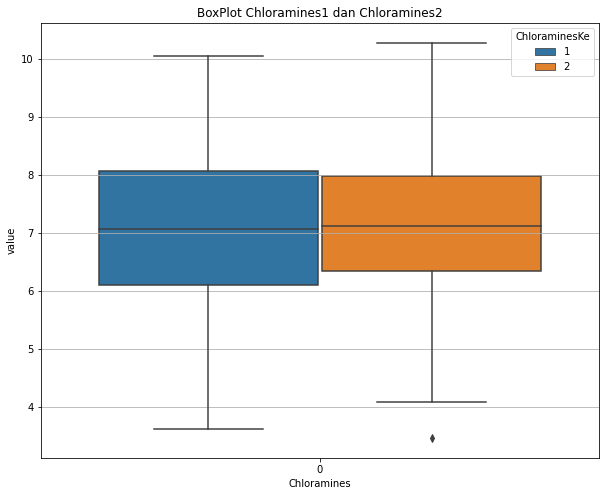

In [342]:
print("Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?")

# Langkah 1
H0 = "μ1=μ2"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "μ1≠μ2 -> μ1-μ2≠0"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα_div2 = round(st.norm.ppf(1-(α/2)),3)
print("4. Uji Statistik: z=((x̄1-x̄2)-d0)/sqrt(σ1²/n1+σ2²/n2), σ diketahui")
print("   Daerah Kritis: z>zα/2 atau z<-zα/2 : z>{} atau z<{}".format(zα_div2,zα_div2))

# Langkah 5
d0 = 0
Chloramines1 = Chloramines[:100]
x̄1 = Chloramines1.mean()
σ1 = Chloramines1.std()
σ1_pow2 = σ1**2
n1 = len(Chloramines1)
Chloramines2 = Chloramines[len(Chloramines)-100:]
Chloramines2.reset_index(inplace=True, drop=True)
x̄2 = Chloramines2.mean()
σ2 = Chloramines2.std()
σ2_pow2 = σ2**2
n2 = len(Chloramines2)
z = round(Z_testStatistic_dual(x̄1,x̄2,d0,σ1_pow2,σ2_pow2,n1,n2),3)
p_value = 1-abs(st.norm.cdf(z)-st.norm.cdf(-1*z))
print("5. Komputasi")
print("   x̄1: {} \n   σ1: {} \n   σ1²: {} \n   n1: {} \n   x̄2: {} \n   σ2: {} \n   σ2²: {} \n   n2: {}".format(x̄1,σ1,σ1_pow2,n1,x̄2,σ2,σ2_pow2,n2))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα_div2 or z < -1*zα_div2):
    if (z > zα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (z>zα)".format(z,zα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (z<-zα)".format(z,-1*zα_div2))
    print("   Rata-rata 100 baris pertama kolom Chloramines tidak sama dengan 100 baris terakhirnya")
else:
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα<z<zα)".format(-1*zα_div2,z,zα_div2))
    print("   Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya")  

# Menggambar Boxplot Chloramines1 dan Chloramines2
# Mengubah ke dalam Bentuk Dataframe
dfChloramines1 = pd.DataFrame(data=Chloramines1.tolist()).assign(ChloraminesKe=1)
dfChloramines2 = pd.DataFrame(data=Chloramines2.tolist()).assign(ChloraminesKe=2)
# Mengombinasikan Dataframe
combine = pd.concat([dfChloramines1,dfChloramines2],sort=False)  
merge = pd.melt(combine, id_vars=['ChloraminesKe'], var_name=['Chloramines'])
# Konfigurasi Boxplot
plt.figure(figsize=(10,8))
plt.grid()
# Penggambaran Boxplot Gabungan
BoxPlotChloraminesm= sns.boxplot(x="Chloramines",y="value",hue="ChloraminesKe",data=merge)
BoxPlotChloraminesm.set_title("BoxPlot Chloramines1 dan Chloramines2")
BoxPlotChloraminesm

### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4 adalah lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity?
Digunakan tes dua proporsi.

Proporsi nilai bagian awal Turbidity yang lebih dari 4 adalah lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity?
1. H0: p1=p2 -> p1-p2=0
2. H1: p1>p2 -> p1-p2>0
3. α = 0.05
4. Uji Statistik: z=(p̂1-p̂2)/sqrt(p̂*q̂*(1/n1+1/n2)), σ diketahui
   Daerah Kritis: z>zα : z>1.645
5. Komputasi
   n1: 1005 
   x1: 486 
   p̂1: 0.484 
   n2: 1005 
   x2: 489 
   p̂2: 0.487 
   p̂: 0.485 
   q̂: 0.515
   p_value: 0.5536940628343817 
   z: -0.135
6. Test Daerah Kritis
   Terima H0 karena nilai uji = -0.135<=1.645 (z<=zα)
   Proporsi bagian awal Turbidity yang lebih dari 4 kurang dari atau sama dengan proporsi nilai yang sama di bagian akhir Turbidity


<AxesSubplot:title={'center':'BoxPlot Turbidity1 dan Turbidity2'}, xlabel='Turbidity', ylabel='value'>

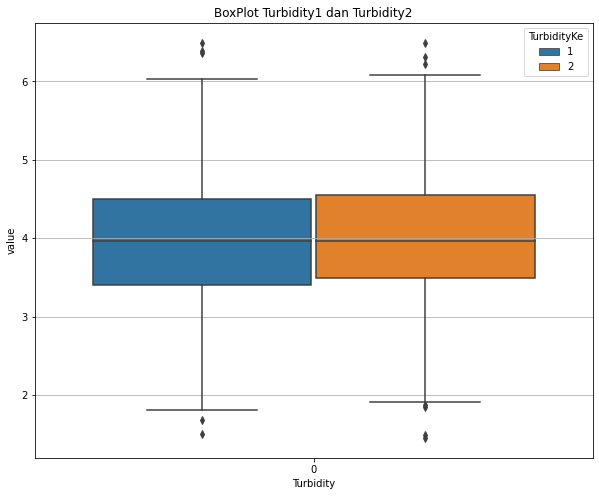

In [343]:
print("Proporsi nilai bagian awal Turbidity yang lebih dari 4 adalah lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity?")

# Langkah 1
H0 = "p1=p2 -> p1-p2=0"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "p1>p2 -> p1-p2>0"
print("2. H1: {}".format(H1))

# Langkah 3
α = 5e-2
print("3. α = {}".format(α))

# Langkah 4
zα = round(st.norm.ppf(1-α),3)
print("4. Uji Statistik: z=(p̂1-p̂2)/sqrt(p̂*q̂*(1/n1+1/n2)), σ diketahui")
print("   Daerah Kritis: z>zα : z>{}".format(zα))

# Langkah 5
Turbidity1 = Turbidity[:len(Turbidity)//2]
Turbidity1_moreThan4 = [turbidity for turbidity in Turbidity1 if turbidity > 4]
n1 = len(Turbidity1)
x1 = len(Turbidity1_moreThan4)
p̂1 = round(float(x1/n1),3)
Turbidity2 = Turbidity[len(Turbidity)//2:]
Turbidity2.reset_index(inplace=True, drop=True)
Turbidity2_moreThan4 = [turbidity for turbidity in Turbidity2 if turbidity > 4]
n2 = len(Turbidity2)
x2 = len(Turbidity2_moreThan4)
p̂2 = round(float(x2/n2),3)
p̂ = round(float((x1+x2)/(n1+n2)),3)
q̂ = 1-p̂
z = round(Z_testStatistic_dualNormal(p̂1,p̂2,p̂,q̂,n1,n2),3)
p_value = 1-st.norm.cdf(z)
print("5. Komputasi")
print("   n1: {} \n   x1: {} \n   p̂1: {} \n   n2: {} \n   x2: {} \n   p̂2: {} \n   p̂: {} \n   q̂: {}".format(n1,x1,p̂1,n2,x2,p̂2,p̂,q̂))
print("   p_value: {} \n   z: {}".format(str(p_value),str(z)))

# Langkah 6
print("6. Test Daerah Kritis")
if (z > zα):
    print("   Tolak H0 karena nilai uji = {}>{} (z>zα)".format(str(z),str(zα)))
    print("   Proporsi bagian awal Turbidity yang lebih dari 4 lebih besar dari proporsi nilai yang sama di bagian akhir Turbidity")
else:
    print("   Terima H0 karena nilai uji = {}<={} (z<=zα)".format(str(z),str(zα)))
    print("   Proporsi bagian awal Turbidity yang lebih dari 4 kurang dari atau sama dengan proporsi nilai yang sama di bagian akhir Turbidity") 

# Menggambar Boxplot Turbidity1 dan Turbidity2
# Mengubah ke dalam Bentuk Dataframe
dfTurbidity1 = pd.DataFrame(data=Turbidity1.tolist()).assign(TurbidityKe=1)
dfTurbidity2 = pd.DataFrame(data=Turbidity2.tolist()).assign(TurbidityKe=2)
# Mengombinasikan Dataframe
combine = pd.concat([dfTurbidity1,dfTurbidity2],sort=False)  
merge = pd.melt(combine, id_vars=['TurbidityKe'], var_name=['Turbidity'])
# Konfigurasi Boxplot
plt.figure(figsize=(10,8))
plt.grid()
# Penggambaran Boxplot Gabungan
BoxPlotTurbiditym= sns.boxplot(x="Turbidity",y="value",hue="TurbidityKe",data=merge)
BoxPlotTurbiditym.set_title("BoxPlot Turbidity1 dan Turbidity2")
BoxPlotTurbiditym

### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
Digunakan tes variansi. Pada kasus ini digunakan alpha sebesar 0.01 agar alpha/2 yang didapatkan ialah 0.005 dan terdapat pada tabel di buku referensi Walpole.

Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
1. H0: σ1²=σ2²
2. H1: σ1²≠σ2² -> σ1²-σ2²≠0
3. α = 0.1
4. Uji Statistik: z=((x̄1-x̄2)-d0)/np.sqrt(σ1²/n1+σ2²/n2), σ diketahui
   Daerah Kritis: f>fα/2(v1,v2) atau f<f1-α/2(v1,v2) : f>1.109 atau f<0.902
5. Komputasi
   n1: 1005 
   σ²1: 1708.3966020772505 
   v1: 1004 
   n2: 1005 
   σ²2: 1682.7330644425106 
   v2: 1004
6. Test Daerah Kritis
   Terima H0 karena nilai uji = 0.902<1.015<1.109 (-zα<z<zα)
   Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya


<AxesSubplot:title={'center':'BoxPlot Sulfate1 dan Sulfate2'}, xlabel='Sulfate', ylabel='value'>

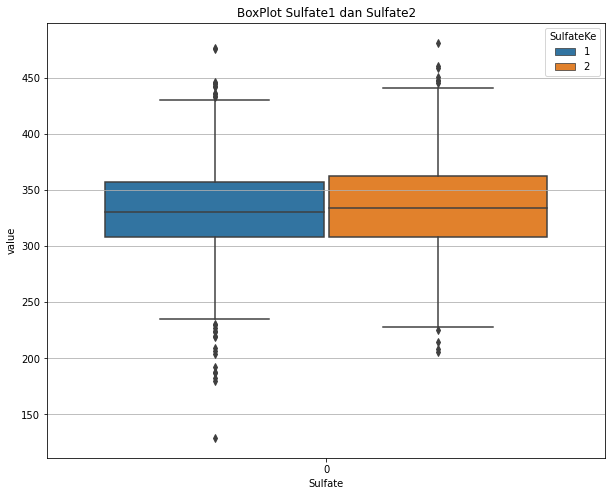

In [344]:
print("Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?")

# Langkah 1
H0 = "σ1²=σ2²"
print("1. H0: {}".format(H0))

# Langkah 2
H1 = "σ1²≠σ2² -> σ1²-σ2²≠0"
print("2. H1: {}".format(H1))

# Langkah 3
α = 1e-1
print("3. α = {}".format(α))

# Langkah 4
Sulfate1 = Sulfate[:len(Sulfate)//2]
Sulfate2 = Sulfate[len(Sulfate)//2:]
Sulfate2.reset_index(inplace=True, drop=True)
n1 = len(Sulfate1)
n2 = len(Sulfate2)
v1 = n1-1
v2 = n2-1
fα_div2 = round(st.f.ppf(q=1-α/2, dfn=v1, dfd=v2),3)
f1_min_αdiv2 = round((1.0/round(st.f.ppf(q=1-α/2, dfn=v2, dfd=v1),3)),3)
print("4. Uji Statistik: z=((x̄1-x̄2)-d0)/np.sqrt(σ1²/n1+σ2²/n2), σ diketahui")
print("   Daerah Kritis: f>fα/2(v1,v2) atau f<f1-α/2(v1,v2) : f>{} atau f<{}".format(fα_div2,f1_min_αdiv2))

# Langkah 5
s1 = Sulfate1.std()
s2 = Sulfate2.std()
f = round(X_testStatisticDual(s1,s2),3)
print("5. Komputasi")
print("   n1: {} \n   σ²1: {} \n   v1: {} \n   n2: {} \n   σ²2: {} \n   v2: {}".format(n1,s1**2,v1,n2,s2**2,v2))


# # Langkah 6
print("6. Test Daerah Kritis")
if (f > fα_div2 or f < f1_min_αdiv2):
    if (f > fα_div2):
        print("   Tolak H0 karena nilai uji = {}>{} (f > fα/2)".format(f,fα_div2))
    else:
        print("   Tolak H0 karena nilai uji = {}<{} (f < f1-α/2)".format(f,f1_min_αdiv2))
    print("   Bagian awal kolom Sulfate memiliki variansi yang tidak sama dengan bagian akhirnya")
else:
    print("   Terima H0 karena nilai uji = {}<{}<{} (-zα<z<zα)".format(f1_min_αdiv2,f,fα_div2))
    print("   Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya")  

# Menggambar BoxPlot Sulfate1 dan Sulfate2
# Mengubah ke dalam Bentuk Dataframe
dfSulfate1 = pd.DataFrame(data=Sulfate1.tolist()).assign(SulfateKe=1)
dfSulfate2 = pd.DataFrame(data=Sulfate2.tolist()).assign(SulfateKe=2)
# Mengombinasikan Dataframe
combine = pd.concat([dfSulfate1,dfSulfate2],sort=False)  
merge = pd.melt(combine, id_vars=['SulfateKe'], var_name=['Sulfate'])
# Konfigurasi Boxplot
plt.figure(figsize=(10,8))
plt.grid()
# Penggambaran Boxplot Gabungan
BoxPlotSulfatem= sns.boxplot(x="Sulfate",y="value",hue="SulfateKe",data=merge)
BoxPlotSulfatem.set_title("BoxPlot Sulfate1 dan Sulfate2")
BoxPlotSulfatem

## Tahap 6 - Tes Korelasi
Mentukan apakah setiap kolom non-target berkorelasi dengan kolom target dengan menggambarkan juga scatter plot nya. Tes korelasi dilakukan dengan menggunakan correlation test.

Daftar kolom non-target adalah sebagai berikut:
1. pH
2. Hardness
3. Solids
4. Chloramines
5. Sulfate
6. Conductivity
7. OrganicCarbon
8. Trihalomethanes
9. Turbidity

Di samping itu, kolom target adalah Potability.

Metode yang digunakan adalah sebagai berikut:

1. Melakukan tes korelasi dengan metode Pearson dengan alpha = 0.05
    - H0 : p = 0 (Tidak ada korelasi diantara kolom non-target dengan kolom target)
    - H1 : p ≠ 0 (Ada korelasi antara kolom non-target dan kolom target) <br><br>
2. Jika terdapat korelasi di antara kolom non-target dan kolom target, cari berapa koefisien korelasi di antara kedua kolom tersebut. Beberapa kesimpulan yang dapat diambil adalah sebagai berikut:
    - Koefisien Korelasi = 1 (Strong Positive Correlation)
    - 0 < Koefisien Korelasi < 1 (Positive Correlation)
    - Koefisien Korelasi = 0 (No Correlation)
    - -1 < Koefisien Korelasi < 0 (Negative Correlation)
    - Koefisien Korelasi = -1 (Strong Negative Correlation) <br><br>
3. Tampilkan Scatter Plot diantara dua kolom tersebut

In [345]:
# Deklarasi kolom potability dan nilai alpha

Potability = df["Potability"]
alpha = 0.05

## 1. Tes Korelasi pH dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah 0.015475094408433436


<AxesSubplot:xlabel='pH', ylabel='Potability'>

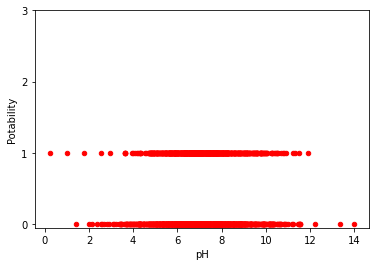

In [346]:
# Metode bagian 1
stat, p = st.pearsonr(pH, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(pH.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='pH', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 2. Tes Korelasi Hardness dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah -0.001463152895947955


<AxesSubplot:xlabel='Hardness', ylabel='Potability'>

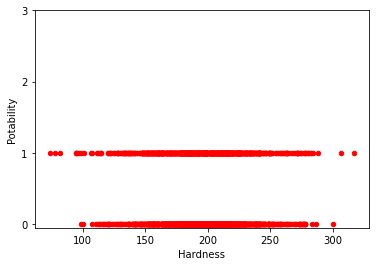

In [347]:
# Metode bagian 1
stat, p = st.pearsonr(Hardness, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Hardness.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Hardness', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 3. Tes Korelasi Solids dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah 0.03897657818173461


<AxesSubplot:xlabel='Solids', ylabel='Potability'>

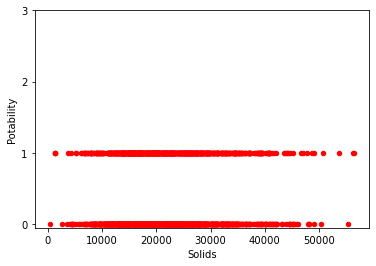

In [348]:
# Metode bagian 1
stat, p = st.pearsonr(Solids, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Solids.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Solids', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 4. Tes Korelasi Chloramines dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah 0.020778921840524055


<AxesSubplot:xlabel='Chloramines', ylabel='Potability'>

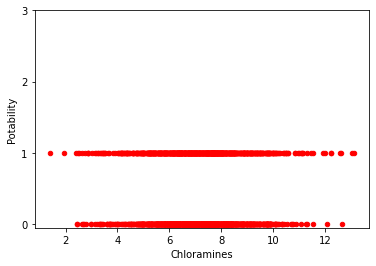

In [349]:
# Metode bagian 1
stat, p = st.pearsonr(Chloramines, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Chloramines.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Chloramines', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 5. Tes Korelasi Sulfate dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah -0.015703164419273767


<AxesSubplot:xlabel='Sulfate', ylabel='Potability'>

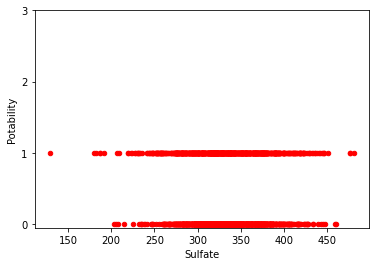

In [350]:
# Metode bagian 1
stat, p = st.pearsonr(Sulfate, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Sulfate.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Sulfate', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 6. Tes Korelasi Conductivity dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah -0.016257120111377043


<AxesSubplot:xlabel='Conductivity', ylabel='Potability'>

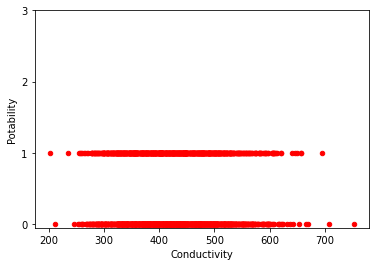

In [351]:
# Metode bagian 1
stat, p = st.pearsonr(Conductivity, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Conductivity.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Conductivity', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 7. Tes Korelasi OrganicCarbon dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah -0.015488461910747254


<AxesSubplot:xlabel='OrganicCarbon', ylabel='Potability'>

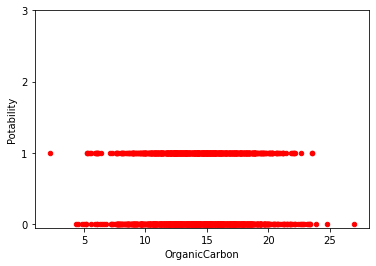

In [352]:
# Metode bagian 1
stat, p = st.pearsonr(OrganicCarbon, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(OrganicCarbon.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='OrganicCarbon', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 8. Tes Korelasi Trihalomethanes dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah 0.009236711064712992


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Potability'>

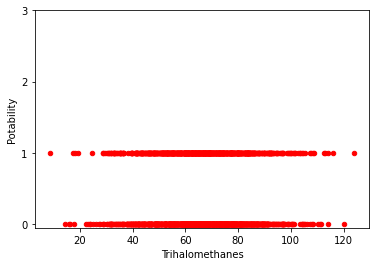

In [353]:
# Metode bagian 1
stat, p = st.pearsonr(Trihalomethanes, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Trihalomethanes.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Trihalomethanes', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')

## 9. Tes Korelasi Turbidity dengan Potability

H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target
Nilai koefisien korelasi adalah 0.022331042640622644


<AxesSubplot:xlabel='Turbidity', ylabel='Potability'>

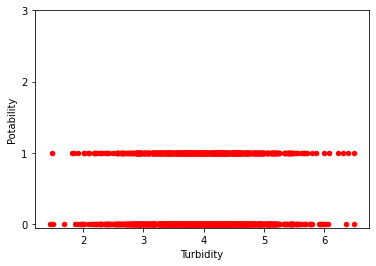

In [354]:
# Metode bagian 1
stat, p = st.pearsonr(Turbidity, Potability)
if p < alpha:
    print("H0 ditolak, sehingga ada korelasi antara kolom non-target dan kolom target")
else:
    print("H0 tidak bisa ditolak, sehingga tidak ada korelasi antara kolom non-target dan kolom target")

# Metode bagian 2
print("Nilai koefisien korelasi adalah {}".format(Turbidity.corr(Potability, method='pearson')))

# Metode bagian 3
df.plot(kind='scatter', x='Turbidity', y='Potability', yticks=[0.0, 1.0, 2.0, 3.0], color='red')